## Restaurant's cuisine ratings data


https://www.kaggle.com/datasets/surajjha101/cuisine-rating

In [1]:
# Importando principais bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o dataframe
df = pd.read_csv('Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [3]:
# informação da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
# descrição dos dados e suas principais estatisticas
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Tirando os espaço entre os nomes das colunas para facilitar a utilização delas

df.columns = df.columns.str.replace(' ','')
df.head()

,UserID,Areacode,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,OftenAS
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [6]:
# Verificando quais localizações temos

df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

In [7]:
# Como todas pertecem a cidade de New York, vou separar e olhar apenas para cada região. 
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'].head()

0    Upper East Side
1         St. George
2    Upper West Side
3    Upper East Side
4       Central Park
Name: Location, dtype: object

In [8]:
df['Location'].unique()

array(['Upper East Side', 'St. George', 'Upper West Side', 'Central Park',
       'China Town', 'Riverdale', 'Market City', 'Cedar Hill'],
      dtype=object)

In [9]:
# calculado a localização com melhor média de avalição da comida
media_geral = df[['Location','FoodRating']].groupby(['Location']).mean()
media_geral = media_geral.sort_values(by='FoodRating', ascending=False)
media_geral

,FoodRating
Location,
Market City,4.045455
St. George,3.413043
Central Park,3.343750
Riverdale,3.035714
Upper West Side,3.000000
Upper East Side,2.966667
China Town,2.681818
Cedar Hill,2.000000


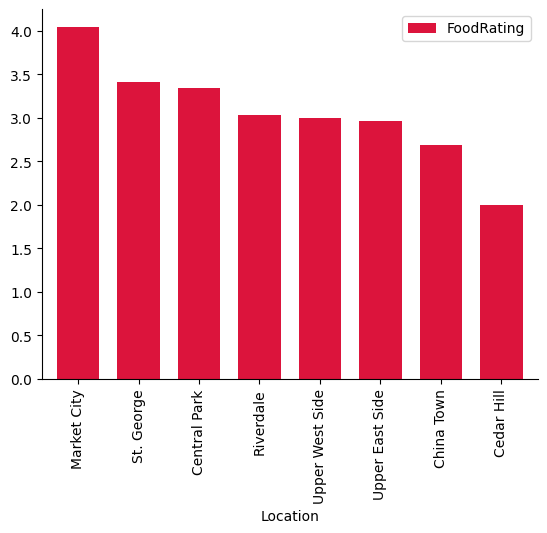

In [10]:
# Ranking das melhores regiões

media_geral.plot(kind='bar', color='crimson', width=0.7)

# Retirando a borda de cima e a borda a direita do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

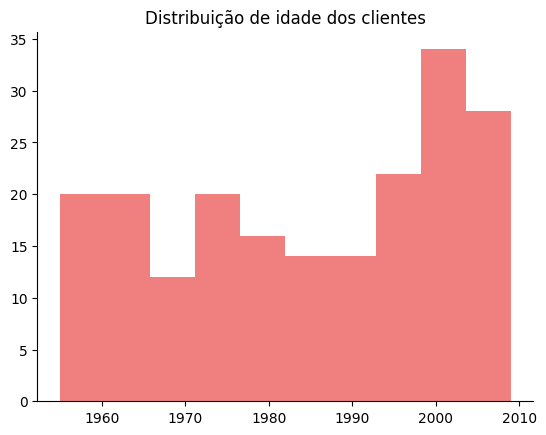

In [11]:
# Agora, vamos ver como é a distribuição de idade dos clientes

plt.hist(data=df, x='YOB', color = 'lightcoral')

plt.title('Distribuição de idade dos clientes', fontsize=12)

# Removendo linhas do topo e da direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Plotando o gráfico
plt.show()

O histograma mostra que temos uma alta concentração de jovens nessa base dados.

In [12]:
# Vou criar uma coluna ficticia, para definir a idade dos clientes
# Usarei o método datatime para isso

import datetime

# Obter a data atual
data_atual = datetime.datetime.now()

# Obter o ano atual
ano_atual = data_atual.year

idade_atual = ano_atual - df['YOB']

# Como os dados não foram extraidos em 2023 (nem no ano que estiver lendo isso)
# Essas idades são apenas um representação
idade_atual


0      17
1      32
2      46
3      67
4      26
       ..
195    41
196    23
197    17
198    21
199    18
Name: YOB, Length: 200, dtype: int64

In [13]:
# Adicionando uma colunas com as idades
df['Idade'] = idade_atual
df.head()

,UserID,Areacode,Location,Gender,YOB,MaritalStatus,Activity,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,OftenAS,Idade
0,1,153,Upper East Side,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,17
1,2,123,St. George,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,32
2,3,122,Upper West Side,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,46
3,4,153,Upper East Side,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,67
4,5,129,Central Park,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,26


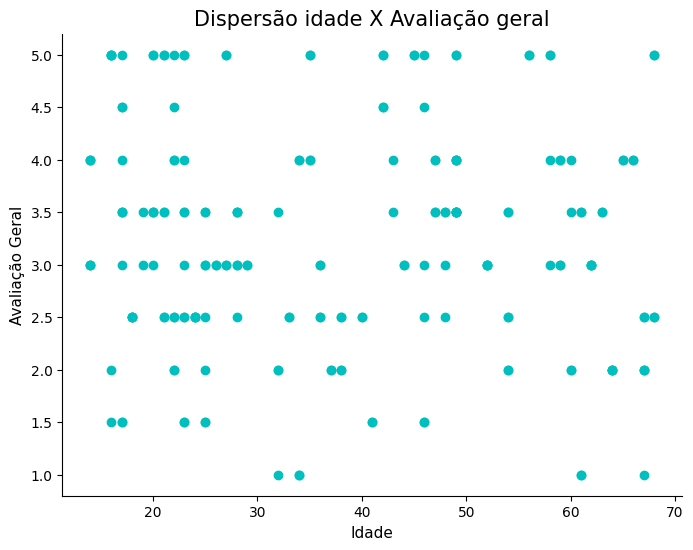

In [14]:
# Criando gráfico de dispersão

# Usando o subplots, pois facilita a manutençao dos detalhes
# fig e ax representam o objeto da fugura e o objeto do eixo
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['Idade'], df['OverallRating'], c='c')

# Configuração de títulos e rótulos
ax.set_title('Dispersão idade X Avaliação geral', fontsize = 15)
ax.set_xlabel('Idade', fontsize = 11)
ax.set_ylabel('Avaliação Geral', fontsize = 11)

# Removendo linhas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Exibindo o gráfico
plt.show()


Olhando graficamente, não parece existir nenhum tipo de correlação entre a idade e a avaliação geral

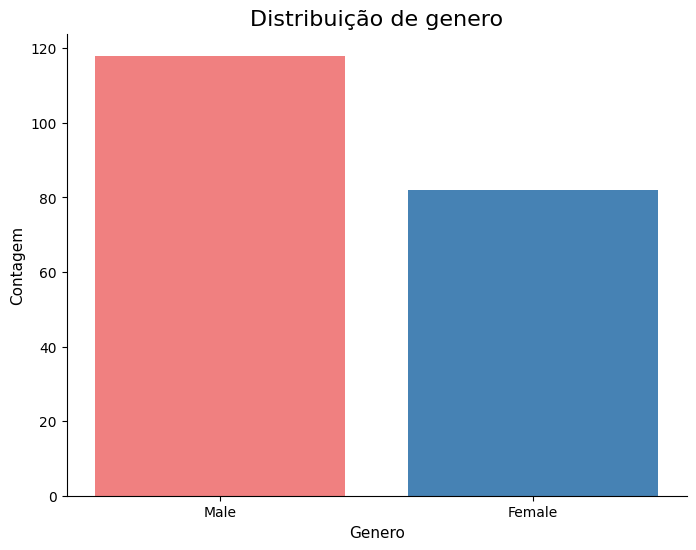

In [15]:
gender_counts = df['Gender'].value_counts()

colors = ['lightcoral', 'steelblue']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(gender_counts.index, gender_counts.values, color = colors)

ax.set_title('Distribuição de genero', fontsize=16)
ax.set_xlabel('Genero', fontsize=11)
ax.set_ylabel('Contagem', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [16]:
mean_rating_sex = df.groupby('Gender')['OverallRating'].mean()
mean_rating_sex

#plt.bar(mean_rating_sex.index, mean_rating_sex.values)
#plt.plot

Gender
Female    3.335366
Male      3.148305
Name: OverallRating, dtype: float64

Aqui podemos perceber que os restaurantes tiveram mais visitas de mulheres

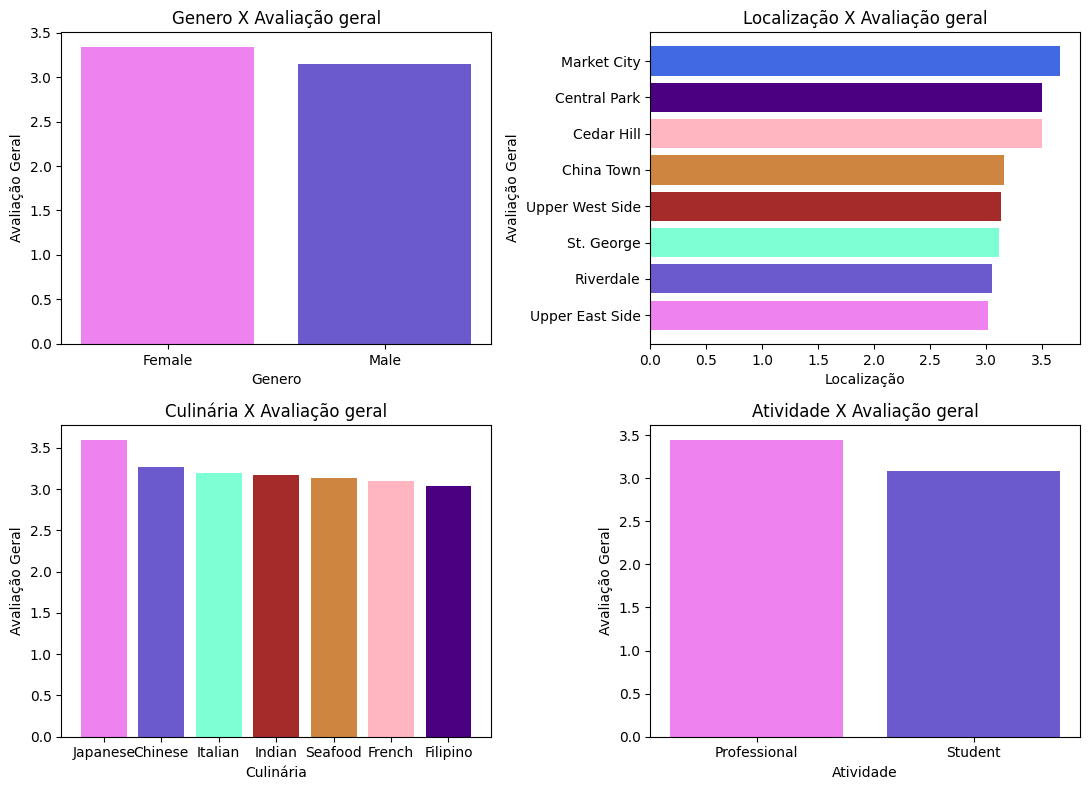

In [17]:
# calculando a media de avaliação por genero
mean_rating_sex = df.groupby('Gender')['OverallRating'].mean()
mean_rating_sex = mean_rating_sex.sort_values(ascending=False)

# Media por localização. Essa media é referente a avaliação geral não a avaliação da comida (já feita anteriormente)
mean_local = df.groupby('Location')['OverallRating'].mean()
mean_local = mean_local.sort_values(ascending = True)

# Avaliação media da culinaria
mean_cusines = df.groupby('Cuisines')['OverallRating'].mean()
mean_cusines = mean_cusines.sort_values(ascending = False)

# Por atividade
mean_act = df.groupby('Activity')['OverallRating'].mean()
mean_act = mean_act.sort_values(ascending = False)

colors = ['violet', 'slateblue', 'aquamarine', 'brown','peru','lightpink', 'indigo', 'royalblue']

# Gráfico e barras para media por genero
fig, ax = plt.subplots(2,2, figsize=(11,8))

# Gráfico de barras para média da avaliação por genero
ax[0,0].bar(mean_rating_sex.index, mean_rating_sex.values ,color=colors)
ax[0,0].set_title('Genero X Avaliação geral')
ax[0,0].set_xlabel('Genero')
ax[0,0].set_ylabel('Avaliação Geral')

# Gráfico de barras para media por localização
ax[0,1].barh(mean_local.index, mean_local.values, color=colors)
ax[0,1].set_title('Localização X Avaliação geral')
ax[0,1].set_xlabel('Localização')
ax[0,1].set_ylabel('Avaliação Geral')

# Gráfico para média por Culinária
ax[1,0].bar(mean_cusines.index, mean_cusines.values, color=colors)
ax[1,0].set_title('Culinária X Avaliação geral')
ax[1,0].set_xlabel('Culinária')
ax[1,0].set_ylabel('Avaliação Geral')


# Gráfico para média por Culinária
ax[1,1].bar(mean_act.index, mean_act.values, color=colors)
ax[1,1].set_title('Atividade X Avaliação geral')
ax[1,1].set_xlabel('Atividade')
ax[1,1].set_ylabel('Avaliação Geral')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

plt.show()

Como essa base de dados é pequena e apenas para treino, vou finalizar a analise por aqui, pois consegui testar as principais habilidades que consegui com meus estudos recentes.